# 라이브러리 임포트

In [12]:
import pandas as pd
import json
import os
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import platform
import matplotlib as mpl


# 폰트 설정

In [13]:
def set_korean_font():
    system = platform.system()

    if system == 'Windows':
        mpl.rc('font', family='Malgun Gothic')
    elif system == 'Darwin':  # macOS
        mpl.rc('font', family='AppleGothic')
    else:
        mpl.rc('font', family='DejaVu Sans')  # 기본값 또는 리눅스용

    mpl.rc('axes', unicode_minus=False)

set_korean_font()

# 경로 설정

In [14]:
JSON_PATH = "./ai05-level1-project/train_annotations"

# DataFrame 생성

In [15]:
def process_json_files(folder_path):
    data = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".json"):
                file_path = os.path.join(root, file)
                try:
                    with open(file_path, "r", encoding="utf-8") as f:
                        json_data = json.load(f)
                        if "images" in json_data and len(json_data["images"]) > 0:
                            image_data = json_data["images"][0]
                            annotation_data = json_data["annotations"][0] if "annotations" in json_data and len(json_data["annotations"]) > 0 else {}
                            category_data = json_data["categories"][0] if "categories" in json_data and len(json_data["categories"]) > 0 else {}

                            record = {
                                "supercategory": category_data.get("supercategory"),
                                "category_id": category_data.get("id"),
                                "category_name": category_data.get("name"),
                                "file_path": file_path,
                                "file_name": image_data.get("file_name"),
                                "width": image_data.get("width"),
                                "height": image_data.get("height"),
                                "drug_N": image_data.get("drug_N"),
                                "drug_S": image_data.get("drug_S"),
                                "back_color": image_data.get("back_color"),
                                "drug_dir": image_data.get("drug_dir"),
                                "light_color": image_data.get("light_color"),
                                "camera_la": image_data.get("camera_la"),

                                "size": image_data.get("size"),
                                "dl_idx": image_data.get("dl_idx"),
                                "dl_mapping_code": image_data.get("dl_mapping_code"),
                                "dl_name": image_data.get("dl_name"),


                                "dl_material": image_data.get("dl_material"),

                                "dl_custom_shape": image_data.get("dl_custom_shape"),
                                "dl_company": image_data.get("dl_company"),


                                "di_item_permit_date": image_data.get("di_item_permit_date"),
                                "di_class_no": image_data.get("di_class_no"),
                                "di_etc_otc_code": image_data.get("di_etc_otc_code"),

                                "chart": image_data.get("chart"),
                                "drug_shape": image_data.get("drug_shape"),
                                "thick": image_data.get("thick"),
                                "leng_long": image_data.get("leng_long"),
                                "leng_short": image_data.get("leng_short"),
                                "print_front": image_data.get("print_front"),
                                "print_back": image_data.get("print_back"),
                                "color_class1": image_data.get("color_class1"),
                                "color_class2": image_data.get("color_class2"),
                                "line_front": image_data.get("line_front"),
                                "line_back": image_data.get("line_back"),

                                "form_code_name": image_data.get("form_code_name"),
                                "mark_code_front_anal": image_data.get("mark_code_front_anal"),
                                "mark_code_back_anal": image_data.get("mark_code_back_anal"),
                                "mark_code_front_img": image_data.get("mark_code_front_img"),
                                "mark_code_back_img": image_data.get("mark_code_back_img"),
                                "mark_code_front": image_data.get("mark_code_front"),
                                "mark_code_back": image_data.get("mark_code_back"),
                                "change_date": image_data.get("change_date"),
                                "id": image_data.get("id"),
                                "area": annotation_data.get("area"),
                                "iscrowd": annotation_data.get("iscrowd"),
                                "bbox": annotation_data.get("bbox"),
                                "category_id": annotation_data.get("category_id"),
                                "ignore": annotation_data.get("ignore"),
                                "segmentation": annotation_data.get("segmentation"),
                                "annotation_id": annotation_data.get("id"),
                                "image_id": annotation_data.get("image_id"),
                            }
                            data.append(record)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    df = pd.DataFrame(data)
    return df


df = process_json_files(JSON_PATH)
df.head()

,supercategory,category_id,category_name,file_path,file_name,width,height,drug_N,drug_S,back_color,...,mark_code_back,change_date,id,area,iscrowd,bbox,ignore,segmentation,annotation_id,image_id
0,pill,27776,카나브정 60mg,./ai05-level1-project/train_annotations/K-0034...,K-003483-025367-027777-035206_0_2_0_2_75_000_2...,976,1280,K-027777,정상알약,연회색 배경,...,,20210309,29,37080,0,"[145, 775, 180, 206]",0,[],111,29
1,pill,27776,카나브정 60mg,./ai05-level1-project/train_annotations/K-0034...,K-003483-025367-027777-035206_0_2_0_2_70_000_2...,976,1280,K-027777,정상알약,연회색 배경,...,,20210309,30,34692,0,"[638, 293, 177, 196]",0,[],109,30
2,pill,27776,카나브정 60mg,./ai05-level1-project/train_annotations/K-0034...,K-003483-025367-027777-035206_0_2_0_2_90_000_2...,976,1280,K-027777,정상알약,연회색 배경,...,,20210309,28,35223,0,"[176, 812, 177, 199]",0,[],110,28
3,pill,25366,자누메트정 50/850mg,./ai05-level1-project/train_annotations/K-0034...,K-003483-025367-027777-035206_0_2_0_2_70_000_2...,976,1280,K-025367,정상알약,연회색 배경,...,,20181112,30,196729,0,"[566, 726, 409, 481]",0,[],105,30
4,pill,25366,자누메트정 50/850mg,./ai05-level1-project/train_annotations/K-0034...,K-003483-025367-027777-035206_0_2_0_2_90_000_2...,976,1280,K-025367,정상알약,연회색 배경,...,,20181112,28,195386,0,"[16, 59, 422, 463]",0,[],103,28


# 결측치 확인
- 빠져 있는 변수들 확인 -> 사실 bbox, ignore 말고는 데이터를 보고 학습에 쓸모있다고는 생각되진 않는데 일단 출력했습니다.
- bbox는 다 차있음.

In [16]:
df.isna().sum().sort_values(ascending=False)

mark_code_front_img     143
form_code_name          143
drug_shape              143
chart                   143
print_front             143
print_back              143
color_class1            143
color_class2            143
line_front              143
change_date             143
mark_code_back          143
mark_code_front         143
mark_code_back_img      143
line_back               143
mark_code_back_anal     143
mark_code_front_anal    143
supercategory             0
leng_long                 0
id                        0
area                      0
iscrowd                   0
bbox                      0
ignore                    0
segmentation              0
annotation_id             0
leng_short                0
thick                     0
category_id               0
light_color               0
category_name             0
file_path                 0
file_name                 0
width                     0
height                    0
drug_N                    0
drug_S              

<Axes: >

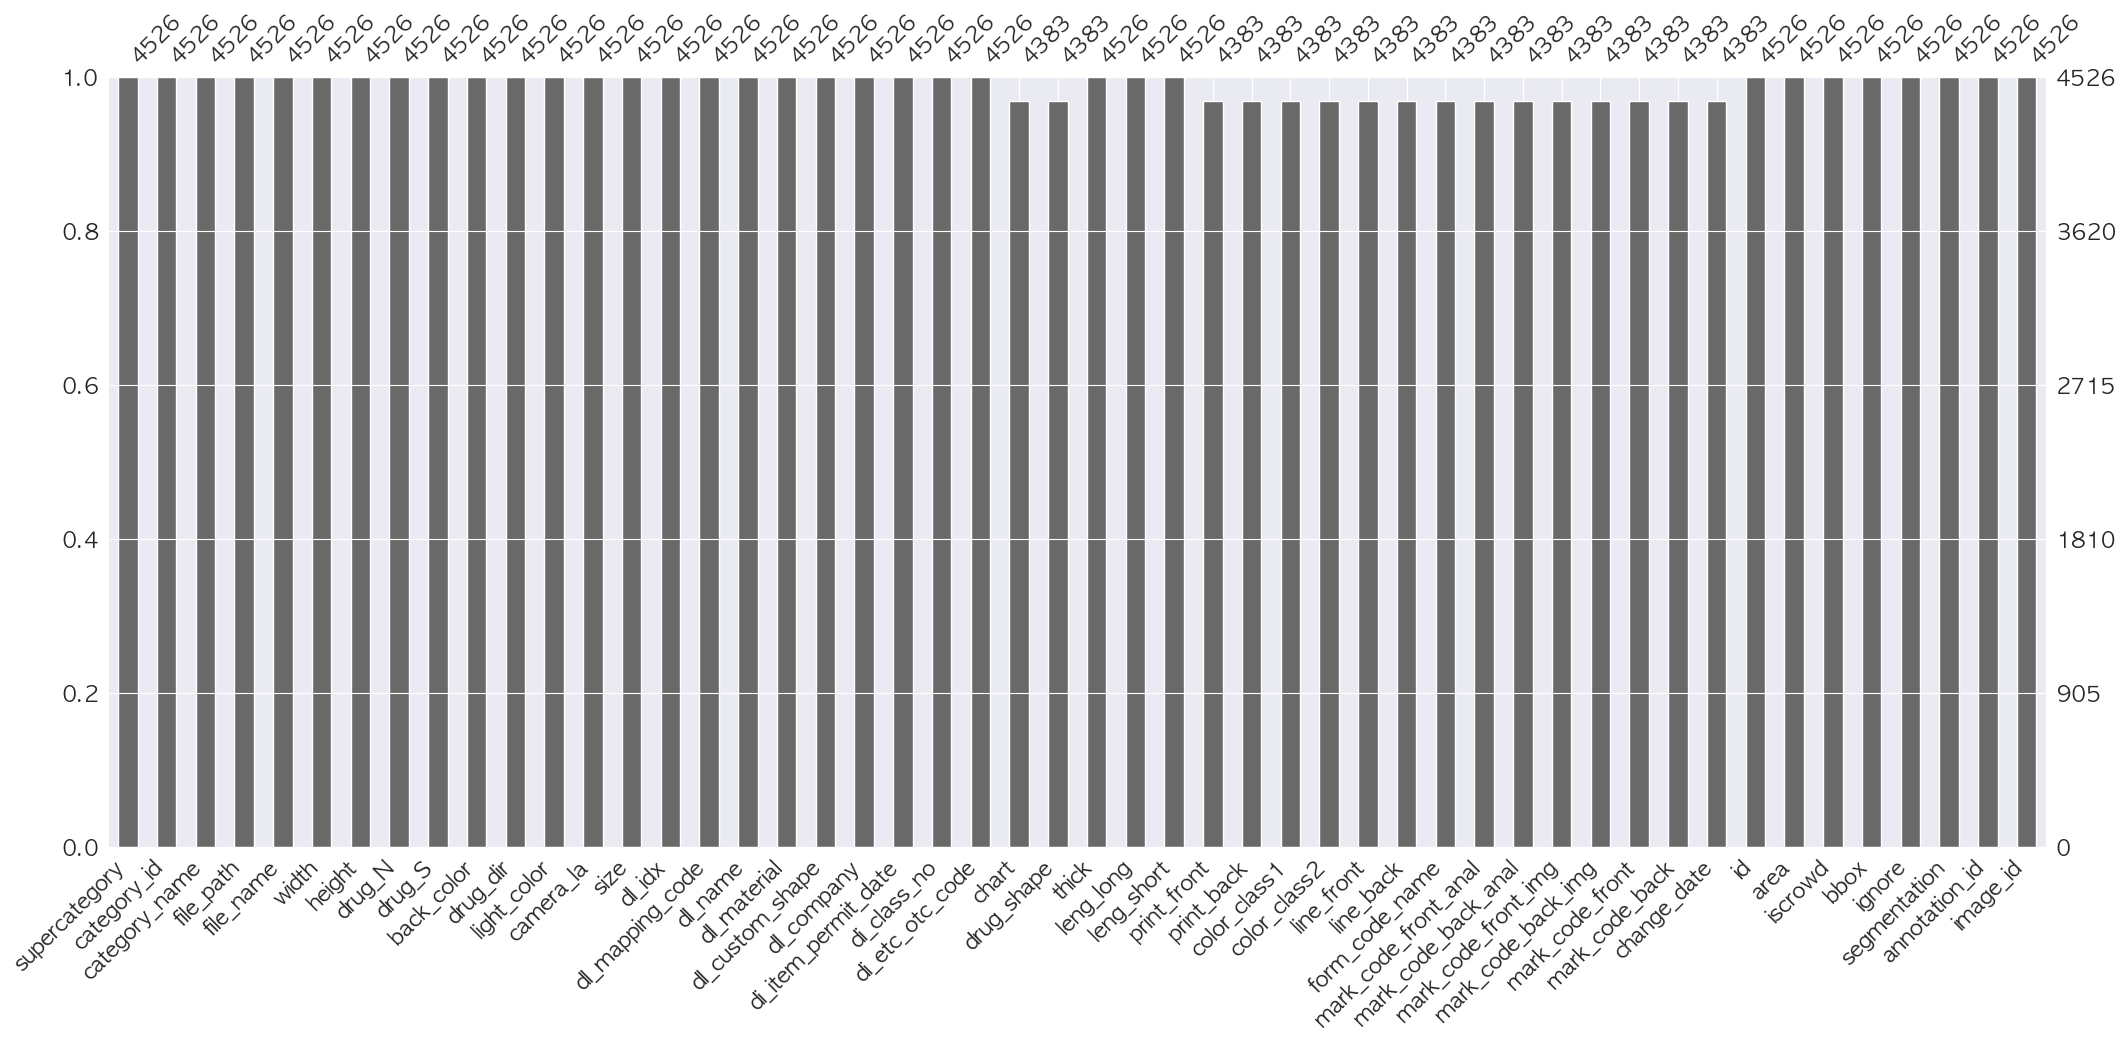

In [17]:
msno.bar(df)

# 수치형 데이터 확인

In [18]:
def detect_outliers_three(df, cols):
    results = []

    for col in cols:
        # 결측값은 제외
        series = df[col].dropna()

        # 사분위수 계산
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1

        # IQR 기준 상·하한 계산
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # 이상치 탐지
        outliers = series[(series < lower) | (series > upper)]
        results.append({
            "컬럼명": col,
            "이상치 개수": len(outliers),
            "이상치 비율(%)": round(len(outliers) / len(series) * 100, 2),
            "최솟값": series.min(),
            "최댓값": series.max(),
            "하한선": round(lower, 2),
            "상한선": round(upper, 2),
        })

    result_df = pd.DataFrame(results).sort_values("이상치 비율(%)", ascending=False)
    return result_df

# 🔹 사용 예시
cols = ["thick", "leng_long", "leng_short"]
outlier_report = detect_outliers_three(df, cols)
print(outlier_report)

          컬럼명  이상치 개수  이상치 비율(%)  최솟값    최댓값   하한선    상한선
0       thick     159       3.51  0.0   9.80  0.25   9.45
2  leng_short     143       3.16  0.0  12.58  2.20  12.60
1   leng_long       0       0.00  0.0  24.00 -6.15  31.85


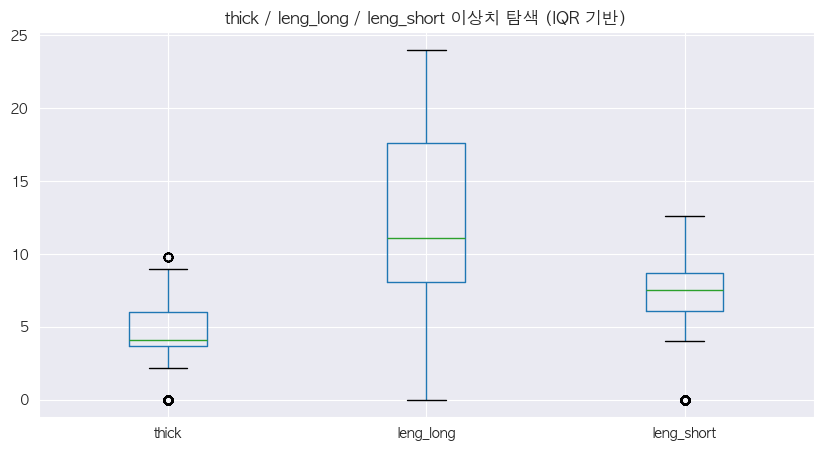

In [34]:
def visualize_three(df, cols):
    plt.figure(figsize=(10, 5))
    df[cols].boxplot()
    plt.title("thick / leng_long / leng_short 이상치 탐색 (IQR 기반)")
    plt.show()

visualize_three(df, cols)

- cm인 경우는 너무 크고 단위가 mm로 생각됨 -> 실제 사진 보니 mm가 맞음.
- https://www.health.kr/searchDrug/result_drug.asp?drug_cd=A11AOOOOO7510
- 0인 것들도 많음
- 이상치 --> 최소값도 0이고, 최대값도 다 삼킬 수 있을 정도라고 생각됨

## 알약 두께, 장축, 단축

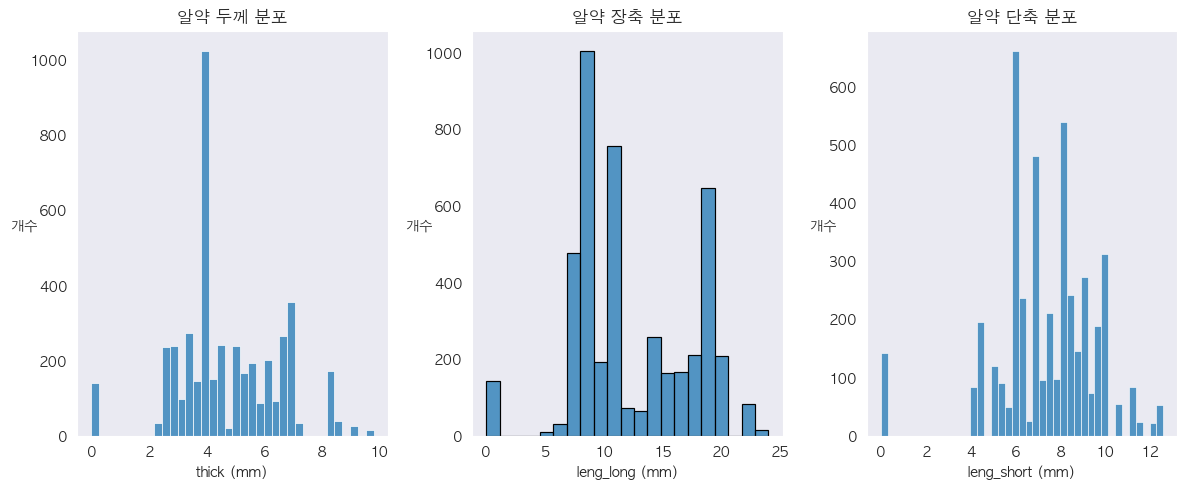

In [20]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 3, 1)
plt.title("알약 두께 분포")
sns.histplot(df['thick'])
plt.ylabel("개수", rotation=0)
plt.xlabel("thick (mm)")
plt.grid()

plt.subplot(1, 3, 2)
plt.title("알약 장축 분포")
sns.histplot(df['leng_long'], edgecolor='k')
plt.ylabel("개수", rotation=0)
plt.xlabel("leng_long (mm)")
plt.grid()

plt.subplot(1, 3, 3)
plt.title("알약 단축 분포")
sns.histplot(df['leng_short'])
plt.ylabel("개수", rotation=0)
plt.xlabel("leng_short (mm)")
plt.grid()

plt.tight_layout()
plt.show()

## 알약 각도

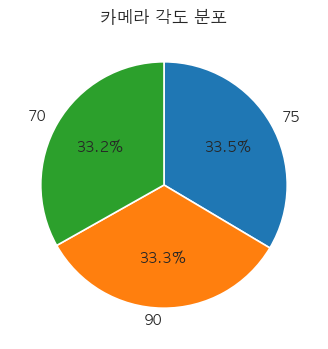

In [21]:
camera_counts = df['camera_la'].value_counts()
plt.figure(figsize=(6, 4))
plt.title("카메라 각도 분포")
plt.pie(
    camera_counts,
    labels=camera_counts.index,      # 70, 75, 90 같은 값 표시
    autopct='%1.1f%%',               # 비율 표시
    startangle=90,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2}  # 테두리로 구분
)

plt.show()

## width, height 이미지의 가로 세로
- 전부 다 똑같은 이미지 사이즈임

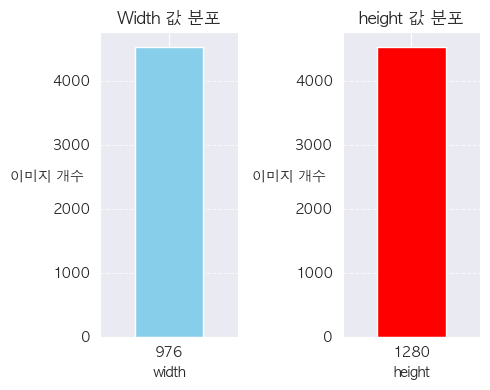

In [22]:
plt.figure(figsize=(5,4))

plt.subplot(1, 2, 1)
df['width'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Width 값 분포")
plt.xlabel("width", rotation=0)
plt.xticks(rotation=0)
plt.ylabel("이미지 개수", rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
df['height'].value_counts().plot(kind='bar', color='red')
plt.title("height 값 분포")
plt.xlabel("height", rotation=0)
plt.xticks(rotation=0)
plt.ylabel("이미지 개수", rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## ignore 학습에 사용할 데이터냐
- 마찬가지로 전부 0 -> 전부 학습에 사용함

ignore
0    4526
Name: count, dtype: int64


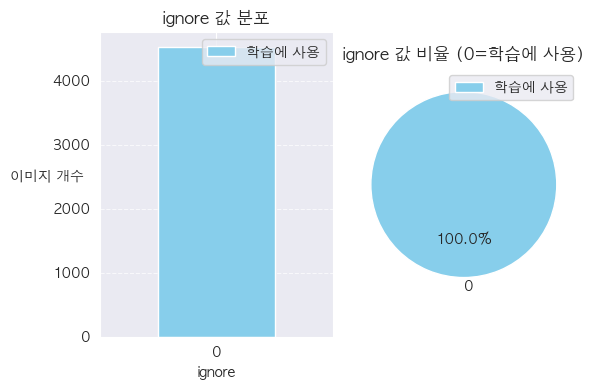

In [23]:
print(df['ignore'].value_counts())
plt.figure(figsize=(6,4))

plt.subplot(1, 2, 1)
df['ignore'].value_counts().plot(kind='bar', color='skyblue', label="학습에 사용")
plt.title("ignore 값 분포")
plt.xlabel("ignore", rotation=0)
plt.xticks(rotation=0)
plt.ylabel("이미지 개수", rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper'
               ' right')

ignore_counts = df['ignore'].value_counts()

plt.subplot(1, 2, 2)
plt.pie(ignore_counts,
        labels=[f"{i}" for i in ignore_counts.index],
        autopct='%1.1f%%',
        colors=['#87CEEB'],
        startangle=90)
plt.title("ignore 값 비율 (0=학습에 사용)")
plt.legend(["학습에 사용"], loc='upper right')
plt.tight_layout()
plt.show()

# 범주형 데이터

## drug_shape (육각형, 타원형...) 확인

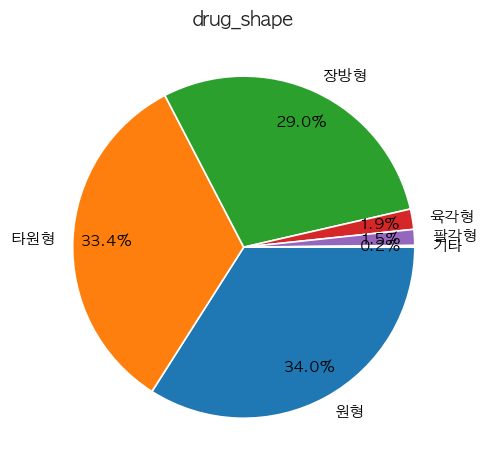

In [24]:

shape_counts = df['drug_shape'].value_counts()

plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(
    shape_counts,
    labels=shape_counts.index,
    autopct='%1.1f%%',
    startangle=0,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    labeldistance=1.1,
    pctdistance=0.8,
    textprops={'fontsize': 11, 'weight': 'bold', 'color': 'black'},

)
plt.title("drug_shape", fontsize=14)
plt.tight_layout()
plt.show()

## color_class1 분포 색상1이 무슨 색이냐

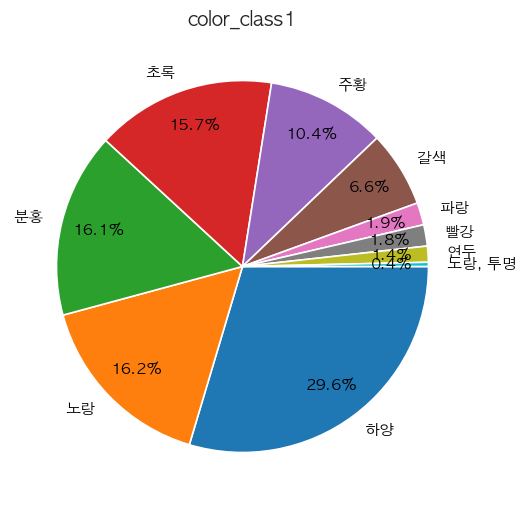

In [25]:

color_counts = df['color_class1'].value_counts()

plt.figure(figsize=(6, 7))
wedges, texts, autotexts = plt.pie(
    color_counts,
    labels=color_counts.index,
    autopct='%1.1f%%',
    startangle=0,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    labeldistance=1.1,
    pctdistance=0.8,
    textprops={'fontsize': 11, 'weight': 'bold', 'color': 'black'},

)
plt.title("color_class1", fontsize=14)
plt.show()

### color_class2 분포 색상 2가 무슨색인가

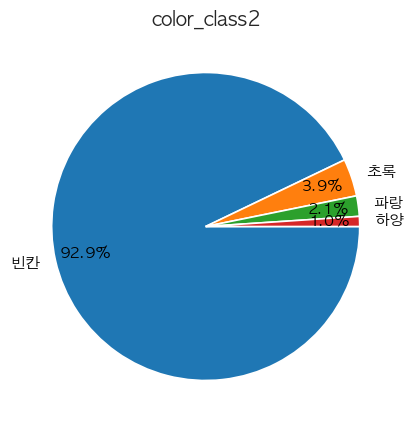

In [26]:
# 빈칸 처리
color_counts = df['color_class2'].replace("", "빈칸").value_counts()

plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(
    color_counts,
    labels=color_counts.index,
    autopct='%1.1f%%',
    startangle=0,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    labeldistance=1.1,
    pctdistance=0.8,
    textprops={'fontsize': 11, 'weight': 'bold', 'color': 'black'},
)
plt.title("color_class2", fontsize=14)
plt.show()

## category_name 몇 종류인가?
- 500개도 있는 알약도 있는 반면에 7개밖에 없는 알약도 있음
- 클래스 불균형 -> 가중치 고려하기


In [27]:
df['category_name'].value_counts() # 73종임

category_name
기넥신에프정(은행엽엑스)(수출용)    514
일양하이트린정 2mg           240
보령부스파정 5mg            180
뮤테란캡슐 100mg           172
가바토파정 100mg           143
                     ... 
졸로푸트정 100mg            11
쿠에타핀정 25mg             10
자이프렉사정 2.5mg            9
렉사프로정 15mg              9
브린텔릭스정 20mg             7
Name: count, Length: 73, dtype: int64

## dl_company 제조사 명

In [28]:
df['dl_company'].value_counts() # 36종임

dl_company
에스케이케미칼(주)      549
한국엠에스디(주)       371
한미약품(주)         350
일양약품(주)         321
(주)유한양행         297
보령제약(주)         296
동아에스티(주)        282
한국베링거인겔하임(주)    262
한국화이자제약(주)      209
한화제약(주)         172
한국아스트라제네카(주)    146
한국오츠카제약(주)      115
제이더블유중외제약(주)    111
(주)한국얀센         106
(주)한독            97
(주)엘지화학          88
한국노바티스(주)        80
한국다이이찌산쿄(주)      79
대원제약(주)          65
한국룬드벡(주)         63
삼남제약(주)          56
에이치케이이노엔(주)      53
(주)종근당           48
알보젠코리아(주)        35
(주)녹십자           35
(주)한국피엠지제약       34
(주)대웅제약          29
일동제약(주)          29
고려제약(주)          27
한국다케다제약(주)       24
(주)한국로슈          23
제일약품(주)          21
대웅바이오(주)         18
건일제약(주)          16
환인제약(주)          10
한국릴리(유)           9
Name: count, dtype: int64

## di_class_no 어떤 약인지?
- 골고루 있음

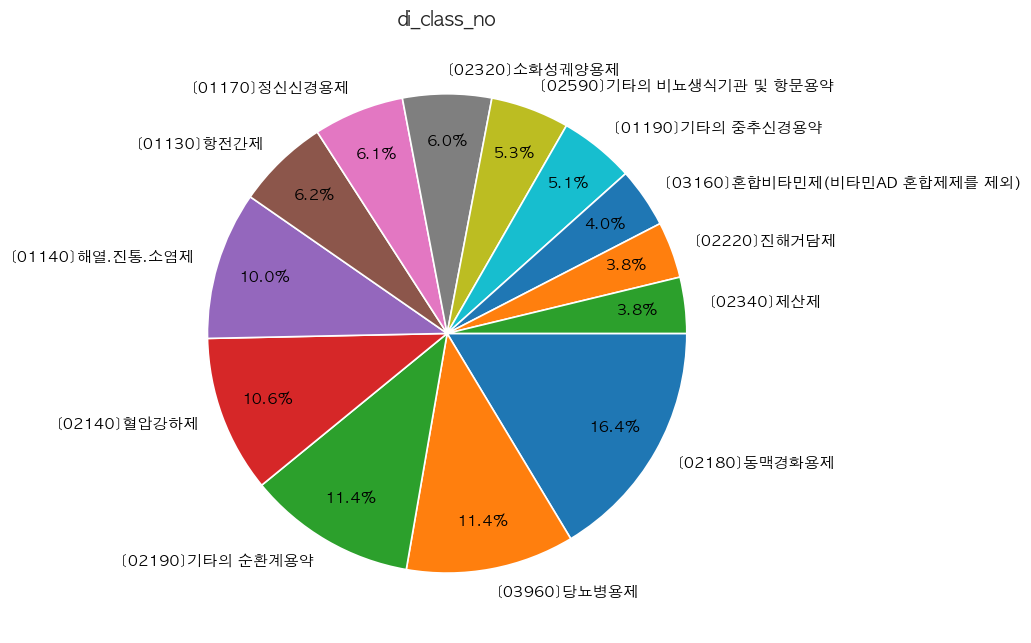

In [29]:
shape_counts = df['di_class_no'].value_counts()

plt.figure(figsize=(10,10))
wedges, texts, autotexts = plt.pie(
    shape_counts,
    labels=shape_counts.index,
    autopct='%1.1f%%',
    startangle=0,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    labeldistance=1.1,
    pctdistance=0.8,
    textprops={'fontsize': 11, 'weight': 'bold', 'color': 'black'},

)
plt.title("di_class_no", fontsize=14)
plt.tight_layout()
plt.show()

## drug_dir 앞면인지 뒷면인지
- 대부분이 앞면임 -> 앞면으로 완벽하게 학습했더라도 같은 알약이 뒷면으로 들어오면 틀릴 수도 있음

drug_dir
앞면    4513
뒷면      13
Name: count, dtype: int64


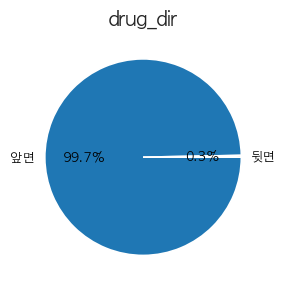

In [30]:
print(df['drug_dir'].value_counts())
shape_counts = df['drug_dir'].value_counts()

plt.figure(figsize=(3,3))
wedges, texts, autotexts = plt.pie(
    shape_counts,
    labels=shape_counts.index,
    autopct='%1.1f%%',
    startangle=0,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    labeldistance=1.1,
    pctdistance=0.6,
    textprops={'fontsize': 9, 'weight': 'bold', 'color': 'black'},

)
plt.title("drug_dir", fontsize=14)
plt.tight_layout()
plt.show()

## dl_custom_shape 제조모양
- 별로 안 중요한듯...
- 제조 모양이라고 나오긴 했는데 흡수 방식이나 먹는 방식으로 분류해놓은거같음

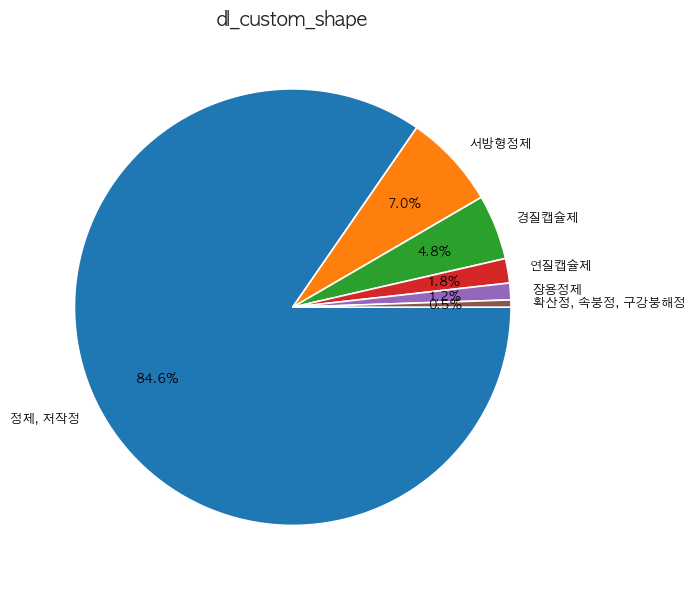

In [31]:
shape_counts = df['dl_custom_shape'].value_counts()

plt.figure(figsize=(7,6))
wedges, texts, autotexts = plt.pie(
    shape_counts,
    labels=shape_counts.index,
    autopct='%1.1f%%',
    startangle=0,
    counterclock=False,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.2},
    labeldistance=1.1,
    pctdistance=0.7,
    textprops={'fontsize': 9, 'weight': 'bold', 'color': 'black'},

)
plt.title("dl_custom_shape", fontsize=14)
plt.tight_layout()
plt.show()

## light_color 촬영할 때 사용한 빛
- 전부 주백색 빛 사용 -> 앞으로 다른 빛을 사용해서 들어온 사진이 있다면 틀리게 예측할 수도 있음

light_color
주백색    4526
Name: count, dtype: int64


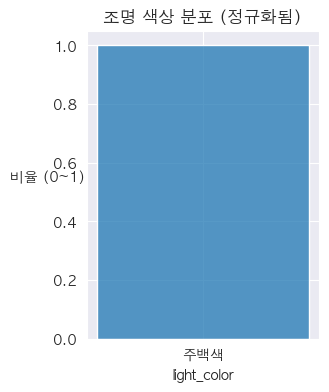

In [32]:
print(df['light_color'].value_counts())
plt.figure(figsize=(3,4))
sns.histplot(df['light_color'],stat="probability" )
plt.title("조명 색상 분포 (정규화됨)")
plt.xlabel("light_color")
plt.ylabel("비율 (0~1)", rotation=0)
plt.show()